<a href="https://colab.research.google.com/github/munyanza/CropYieldModel_Steamlit_App/blob/main/Crop_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the necessary libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Pandas for data manipulation and numpy for numericaldata
import pandas as pd
import numpy as np

# Seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit learn for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

# XGBRegressor for model training
from xgboost import XGBRegressor

# Used for model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# For saving the trainined model
import joblib


### Load the dataset

In [6]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS_/Crop_yield_/yield_df.csv")

### Data check

In [7]:
# First 5 rows
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
# Missing values
df.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [9]:
# Statistical summary
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [10]:
# Number of rows and columns
df.shape

(28242, 8)

In [11]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [12]:
# Column names
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

### EXploration Data Analysis

Text(0.5, 1.0, 'Heatmap for numerical data')

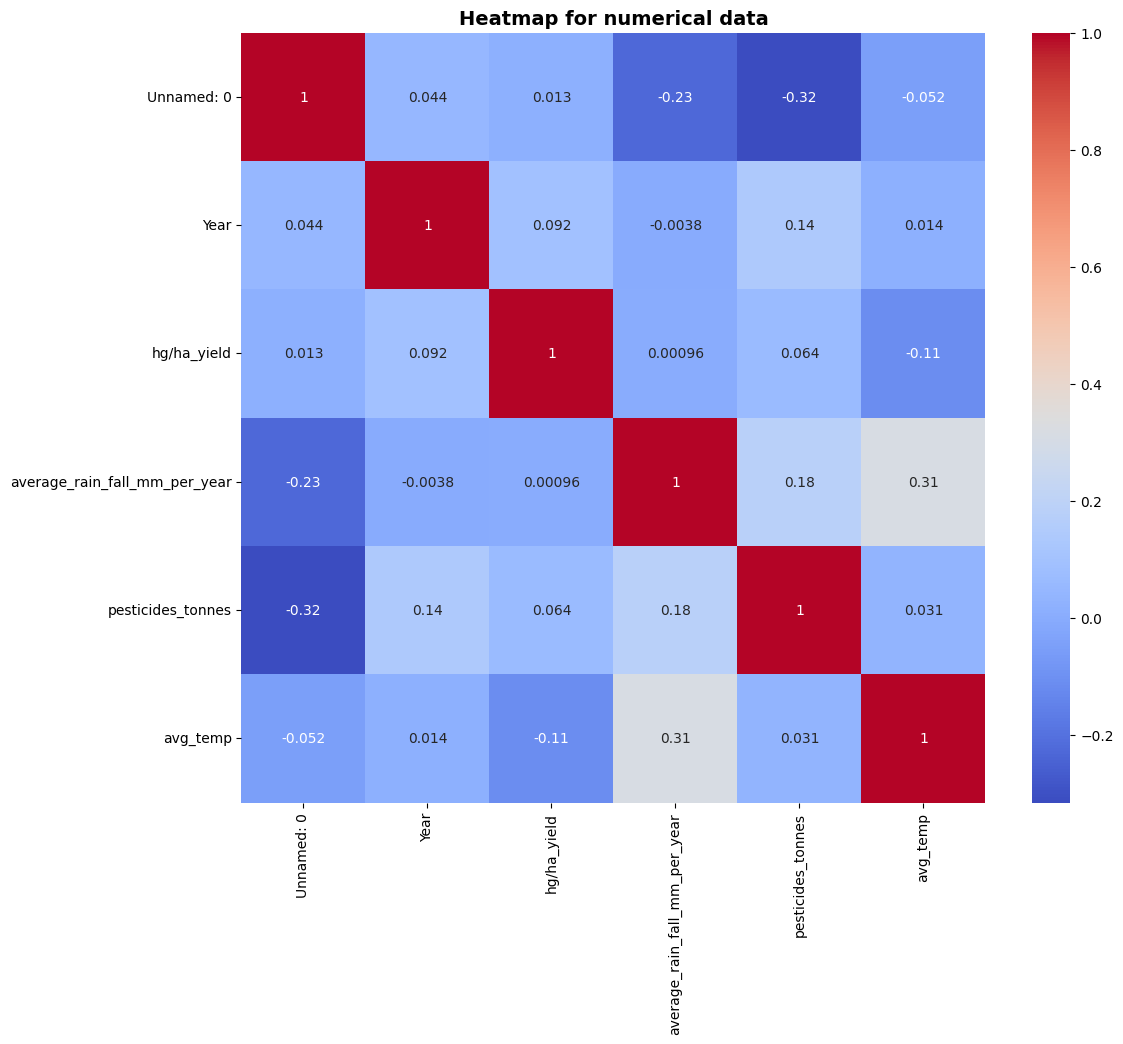

In [13]:
# Heatmap
# Shows how the numerical columns are important to each other
numerical_cols = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(12,10))
sns.heatmap(numerical_cols.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap for numerical data",fontweight='bold',fontsize=14)

Text(0, 0.5, 'Item')

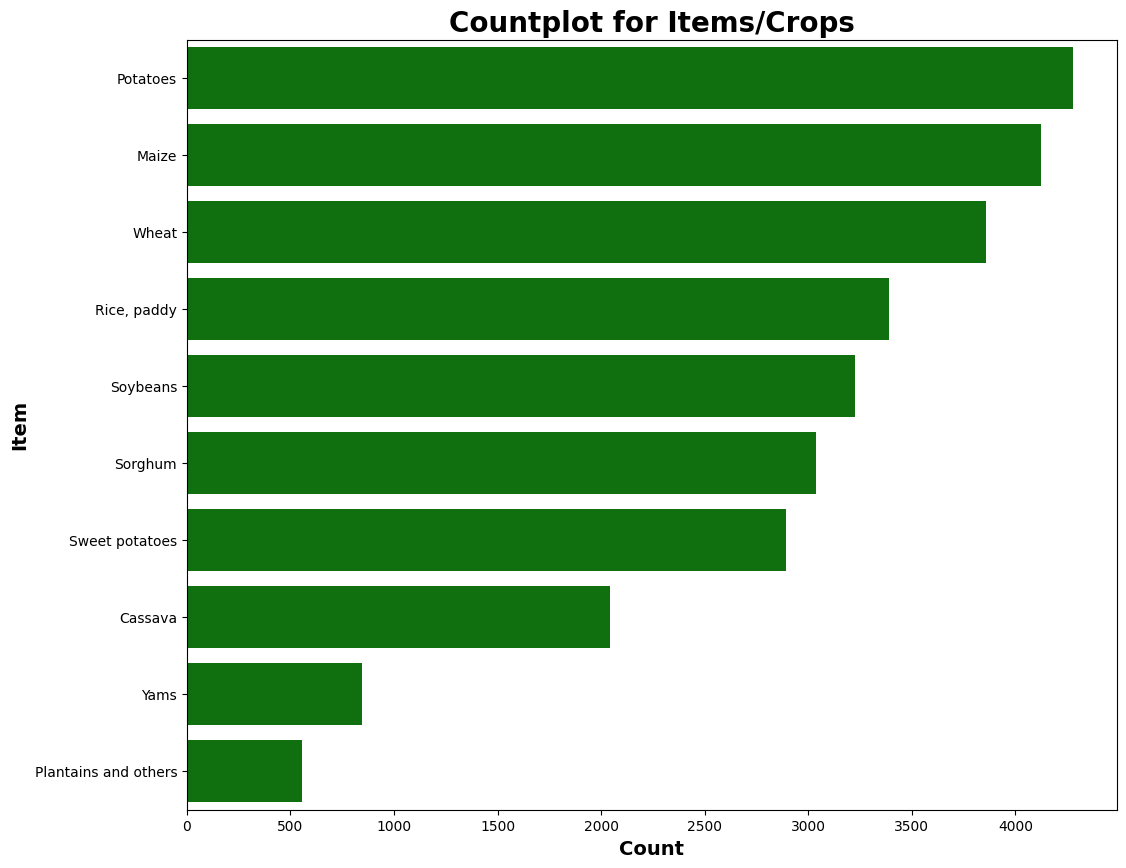

In [14]:
# Countplot for the crops
order = df['Item'].value_counts().index
plt.figure(figsize=(12,10))
sns.countplot(y=df['Item'],data=df,color='green',order=order)
plt.title("Countplot for Items/Crops",fontweight='bold',fontsize=20)
plt.xlabel("Count",fontweight='bold',fontsize=14)
plt.ylabel("Item",fontweight='bold',fontsize=14)

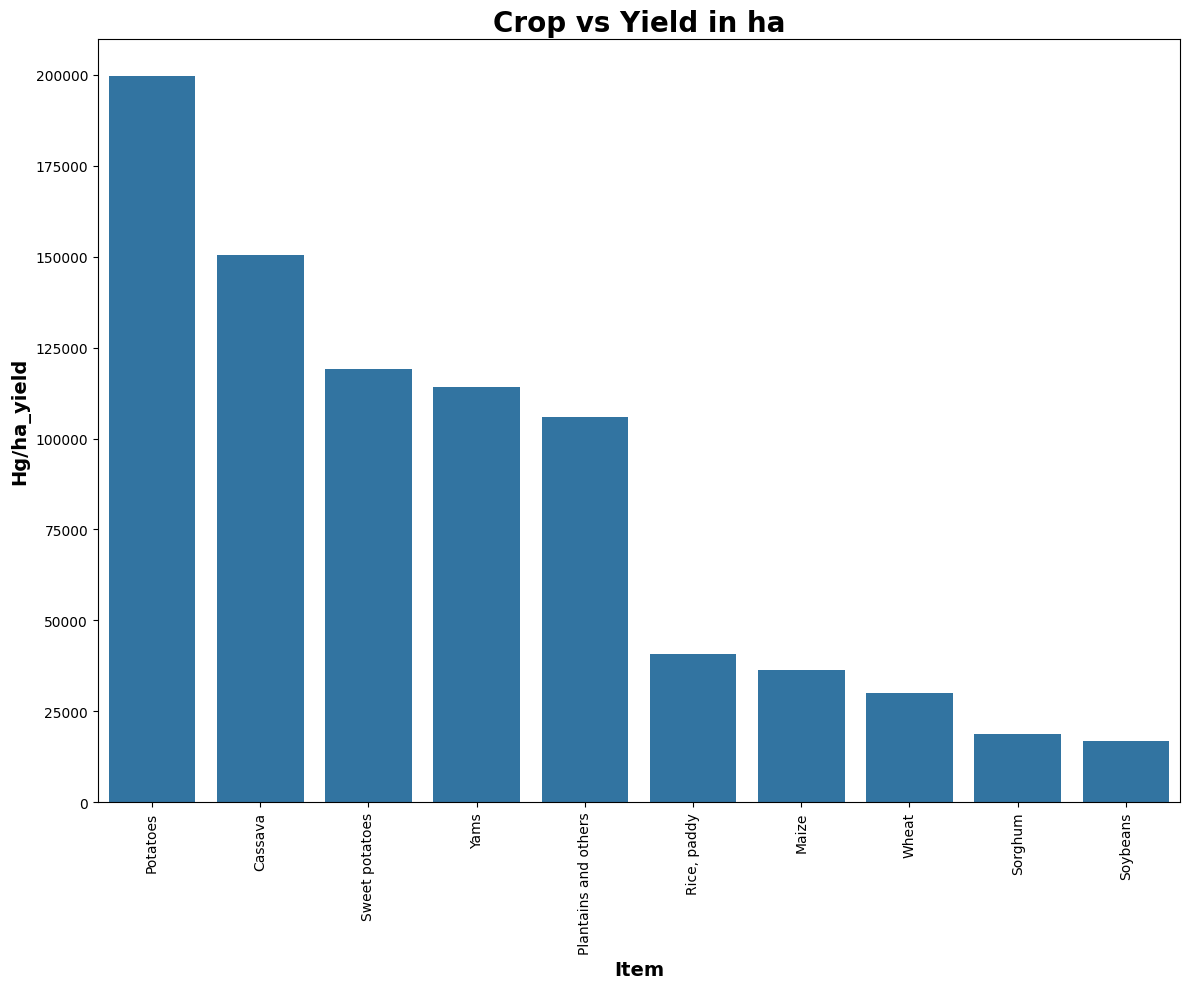

In [15]:
# Crop vs yield barplot

order = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False).index
plt.figure(figsize=(12,10))
sns.barplot(x=df['Item'],y=df['hg/ha_yield'],errorbar=None,order=order)
plt.title("Crop vs Yield in ha",fontweight='bold',fontsize=20)
plt.xlabel("Item",fontweight='bold',fontsize=14)
plt.ylabel("Hg/ha_yield",fontweight='bold',fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

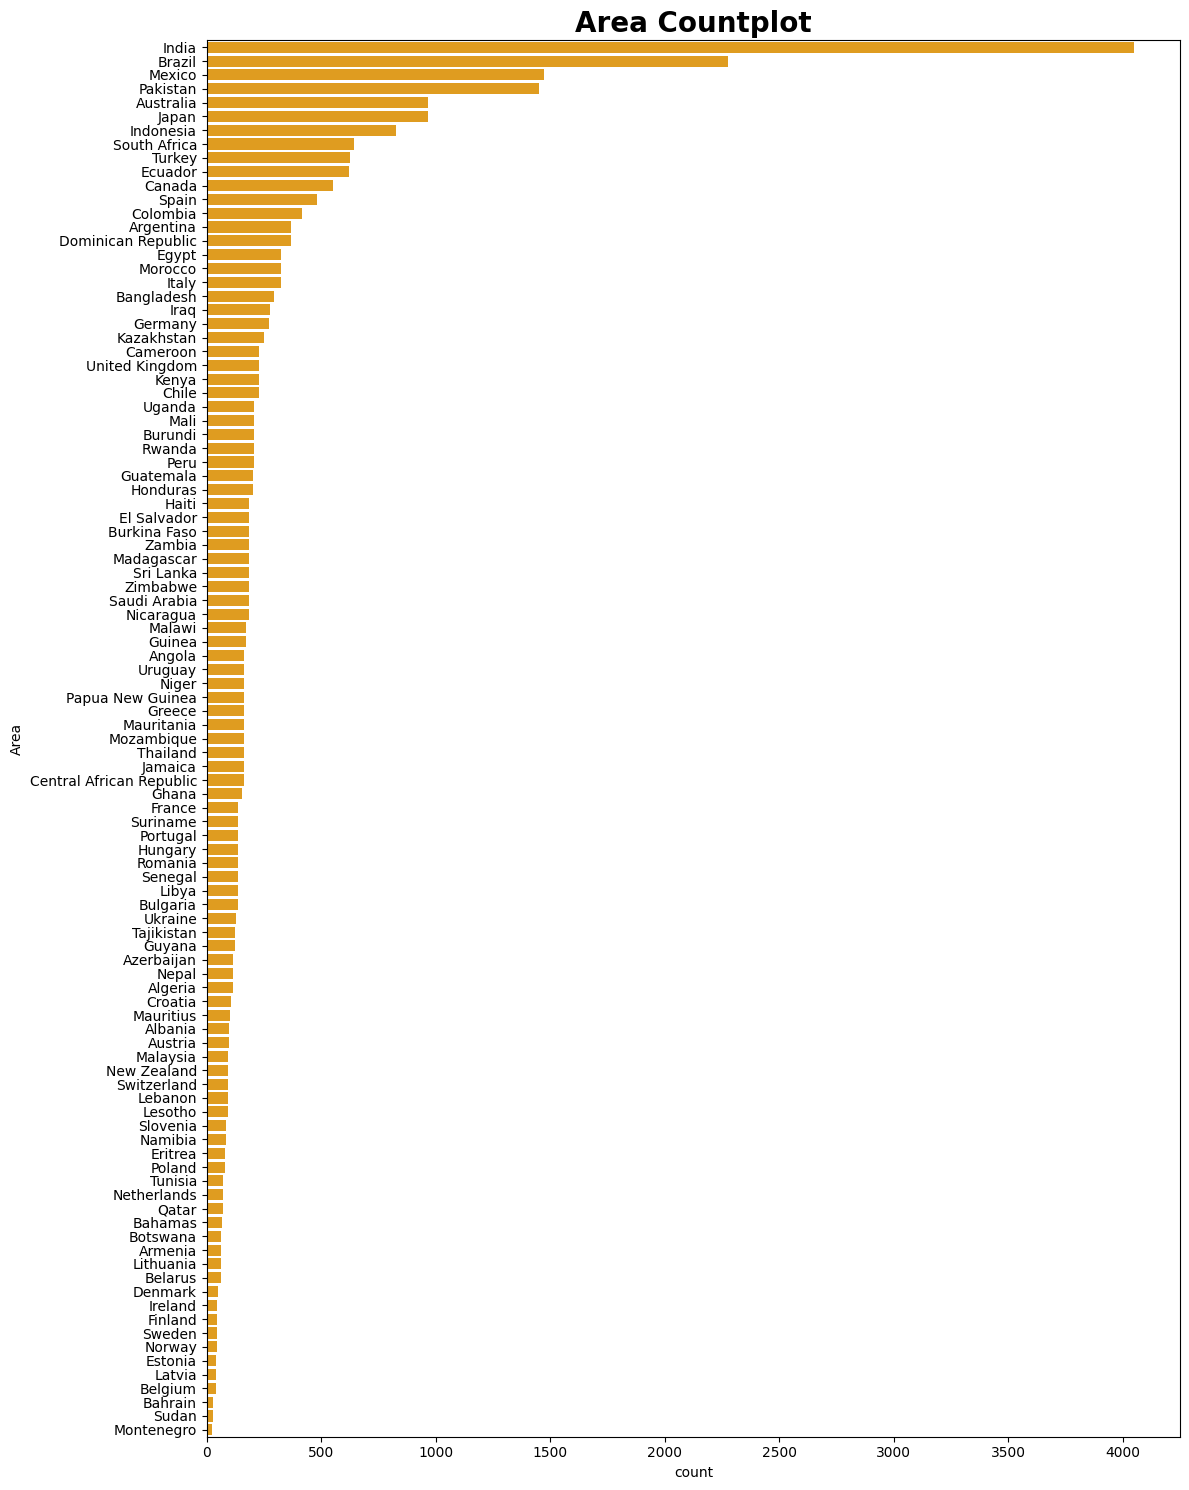

In [16]:
# Area Countplot

order = df['Area'].value_counts().index
plt.figure(figsize=(12,15))
sns.countplot(y=df['Area'],data=df,color='orange',order=order)
plt.title("Area Countplot",fontweight='bold',fontsize=20)
plt.tight_layout()

Text(0, 0.5, 'hg/ha_yield')

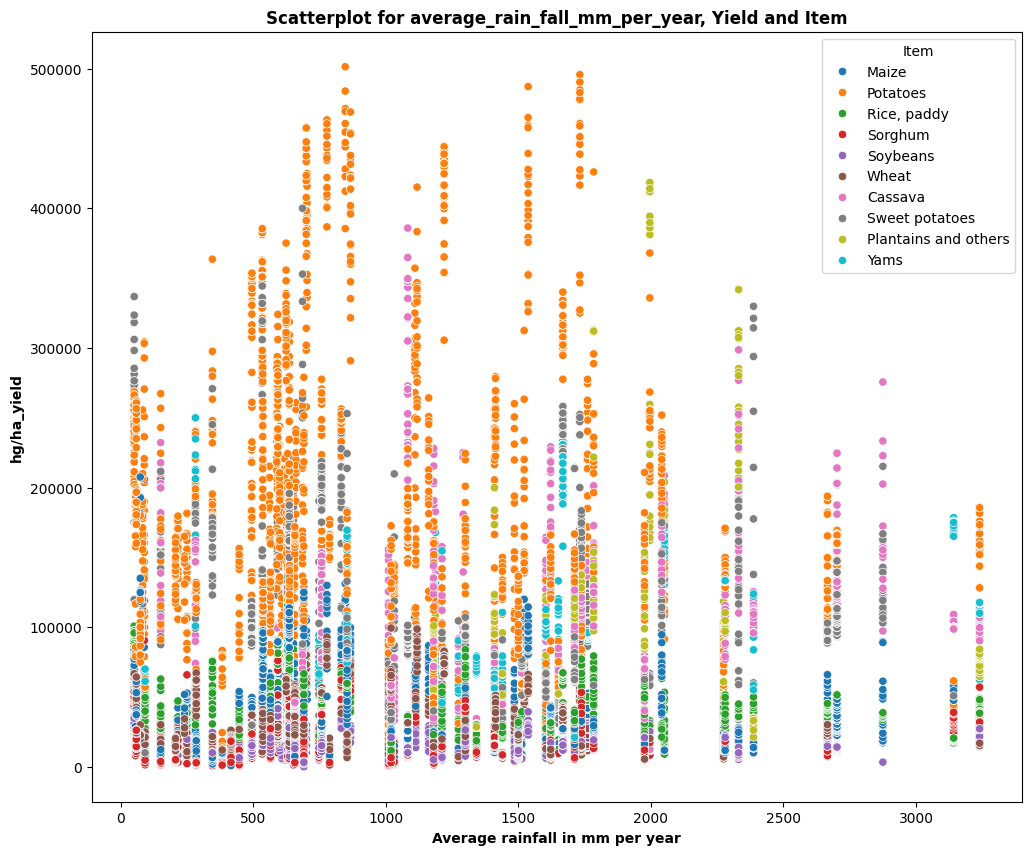

In [17]:
# Scatterplot for Item,yield and year
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['average_rain_fall_mm_per_year'],y=df['hg/ha_yield'],hue=df['Item'])
plt.title("Scatterplot for average_rain_fall_mm_per_year, Yield and Item",fontweight='bold')
plt.xlabel("Average rainfall in mm per year",fontweight='bold')
plt.ylabel("hg/ha_yield",fontweight='bold')

### Feature Engineering


In [18]:
# Separate Features(X) and Target(y)
X = df[['Area','Item','Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']]
y = df['hg/ha_yield']

In [19]:
# Features
X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [20]:
# Target
y.head()

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000


In [21]:
# Split the data into train and test
# 80% for training and 20% for testing
# Random State represents 42 samples from the dataset that will be trained and tested

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# Split the Categorical and numerical columns
# numerical cols contain float64 and int64 datatypes while categorical columns contain the object data type
# This phase ensures that the data is well prepared to before training

categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(include=['float64','int64']).columns

In [23]:
# Categorical columns
categorical_columns

Index(['Area', 'Item'], dtype='object')

In [24]:
# numerical columns
numerical_columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp'],
      dtype='object')

In [25]:
# Data Preprocessing
# Categorical columns are converted from string to intergers
# using OneHotEncoder for the model
# to undarstand because it works with numerical data.

# Numerical columns are scaled (convert the numerical data
# to -1,0,1 for the data to be distributed evenly )using StandardScaler
# Preprocessor converts the previously unscaled data to scaled

numerical_transformer = Pipeline(steps=[
    ('scale',StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_columns),
        ('cat',categorical_transformer,categorical_columns)
    ]
)

In [26]:
# Transform the Features
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_Scaled = preprocessor.transform(X_test)

### Model Training

In [27]:
# Train the model using XGBRegressor

model = XGBRegressor()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_Scaled)

### Model Evaluation

In [28]:
# R2 Measures the accuracy of the model
# Mean absolute error measures how wrong the model is on average from
# the actual data
# Mean squared error shows how big are the mistakes


r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("R2 Score: ",r2)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)

R2 Score:  0.9759294390678406
Mean Absolute Error:  7720.5771484375
Mean Squared Error:  174599952.0


### Save the model

In [29]:
# Save the preprocessor
joblib.dump(preprocessor,"preprocessor.pkl")
# Save the model
joblib.dump(model,"model.pkl")

['model.pkl']